# Project 2 - Optimizing the Popcorn Cooking Process

Question: What is the optimal surface area to volume ratio for popping popcorn at 232.2 degrees Celcius for a given time? Also, can we model the behavior of popcorn kernels at different times during cooking?



Methodology: First, we related the specific heat equation and the thermal conducitivity equation to find the change in temperature at each layer of the popcorn kernels. We know the ideal popping temperature of popcorn kernels to be 180 degrees Celcius. We approximated a popping rate for each kernel as there are expected to be duds. 

Next, we will create a model that has a surface area of 25 cm^^2 and we will change the volume of the popcorn kernels with additional layers. Each layer will have exactly 50 kernels. We will apply our derived change in temperature equation for each individual layer in conjunction with our pop rate to find the total number of unpopped, popped, and burnt kernels over 

Assumptions: 
- Pan starts at 232.2 degrees Celcius
- The outside rim of the constraining cylinder does not affect cross sectional area
- Ignore oil temperature's effect on the system
- The thermal conducivity of rice (.031 w/mk) is similar to that of a popcorn kernel as they are both hard starches
- Kernels are not changing layers at any time. 

Results: We expect to have a graph that has change in temperature over time for each layer of kernels and that each layer of kernels will take more time to reach the same change in temperature. Then, we set a cutoff time for all layers (t_final). Our final result will return a table / graph.

Interpretation: From our results, we will be able to inform the user with a give time and a given number of popcorn kernels one can find the ideal volume of kernels to maximize popcorn output.

In [81]:
#figures appear in notebook
%matplotlib inline 

%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

#import modsim functions
from modsim import *  
from pandas import read_html 

In [103]:
system = System(t_0 = 0,
                t_final = 100,   #Number of time steps
                pop_c = 1.510,  #Specific heat of popcorn kernel (J/K)
                al_c = 0.900,   #Specific heat of aluminum pan   (J/K)
                pop_rate = 0.75, #Rate from experimental testing
                pop_sa = 10,    #Surface area of kernels touching pan (cm^2)
                pop_vol = 10,   #Volume of the all kernels (cm^3)
                deltat = 209.2,     #Change in temperature of popcorn kernels (C)
                al_k = 205,     #Conductivity of aluminum pan (w/mk)
                pop_k = .031,   #Conductivity of rice (w/mk)
                al_d = .75,       #Thickness of pan (cm)
                pop_m = 10*1.05,
                layers = 10,
                kernelsperlayer = 10)      #Mass of popcorn kernels (g)
                

state = State(kernels = system.kernelsperlayer * system.layers, #Starting number of kernels
              popped = 0,
              unpopped = 0,
              burnt = 0)


,values
kernels,100.0
popped,0.0
unpopped,0.0
burnt,0.0


In [104]:
pcent = 1/system.layers
first_layer = int(pcent*system.layers)
other_layers = int((1-pcent)*system.layers)

9

In [105]:
def pop_rate(system,state):
    pop_layer = 0
    for i in range(int(system.kernelsperlayer)):
        if flip(system.pop_rate):
            pop_layer += 1
        
    return pop_layer     

In [106]:
pop_rate(system,state)

10

In [125]:
def update_func_1(state, t, system):
    
    dp = 0
    dt = 1/101
    
    unpack(system)
    
    temp = (al_k*(pop_sa*deltat)*t_final) / (al_d*pop_m*pop_c)
    temp2 =(pop_k*(pop_sa*deltat)*t_final) / (al_d*pop_m*pop_c)
    

    for i in linrange (first_layer):
            if (temp >= 180.0):
                 
                pop_layer = 0
                for i in range(int(kernelsperlayer)):
                    if flip(pop_rate):
                        pop_layer += 1
                    
                        dp = pop_layer
        
                state.kernels -= (kernelsperlayer*dt)
                state.popped += (dp *dt)
                state.unpopped += ((kernelsperlayer - dp ) *dt)
        
    
    return state

In [126]:
def update_func_2(state, t, system):
    
    dp = 0
    dt = .01
    
    unpack(system)
    
    temp = (al_k*(pop_sa*deltat)*t_final) / (al_d*pop_m*pop_c)
    temp2 =(pop_k*(pop_sa*deltat)*t_final) / (al_d*pop_m*pop_c)
    
        
    for i in linrange (other_layers):
            if(temp2 >= 180):
                
                pop_layer = 0
                for i in range(int(kernelsperlayer)):
                    if flip(pop_rate):
                        pop_layer += 1
                        
                        dp = pop_layer
                
                state.kernels -= (kernelsperlayer*dt)
                state.popped += (dp *dt)
                state.unpopped += ((kernelsperlayer - dp) *dt)
    
    return state

In [131]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t_0] = state
    
    for t in linrange(t_0, t_final*pcent):
        frame.row[t+1] = update_func_1(frame.row[t], t, system)
        
    for t in linrange(t_final*pcent, t_final):
        frame.row[t+1] = update_func_2(frame.row[t], t, system)
    
    return frame

In [132]:
results = run_simulation(system,update_func)

,kernels,popped,unpopped,burnt
0.0,100.000000,0.000000,0.000000,0.0
1.0,99.900990,0.069307,0.029703,0.0
2.0,99.801980,0.128713,0.069307,0.0
3.0,99.702970,0.207921,0.089109,0.0
4.0,99.603960,0.277228,0.118812,0.0
5.0,99.504950,0.326733,0.168317,0.0
6.0,99.405941,0.415842,0.178218,0.0
7.0,99.306931,0.485149,0.207921,0.0
8.0,99.207921,0.584158,0.207921,0.0
9.0,99.108911,0.643564,0.247525,0.0


<BarContainer object of 101 artists>

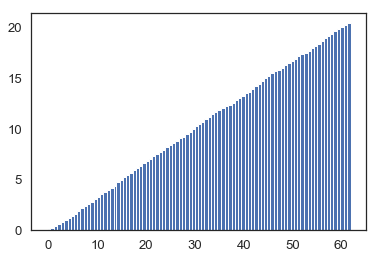

In [130]:
plt.bar(results.popped, results.unpopped)